# Classification Model
Here we are predicting either the customer will get the loan or not based upon features that are availabe to us in a dataset

In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [62]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and overview of data

In [63]:
df_train=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [64]:
df_train.shape

(614, 13)

# Cross check datatypes and NaN values


In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [66]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
df_train.isna().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
df_train['Credit_History'] = df_train['Credit_History'].astype('O')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


Object type statistics

In [69]:
df_train.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001996,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


Check Duplicates if any

In [70]:
df_train.duplicated().any().sum()

0

Drop ID we don't have any use of it

In [71]:
df_train.drop('Loan_ID',axis=1,inplace=True)

Confirm it

In [72]:
df_train.shape

(614, 12)

# Check target class is balanced or not

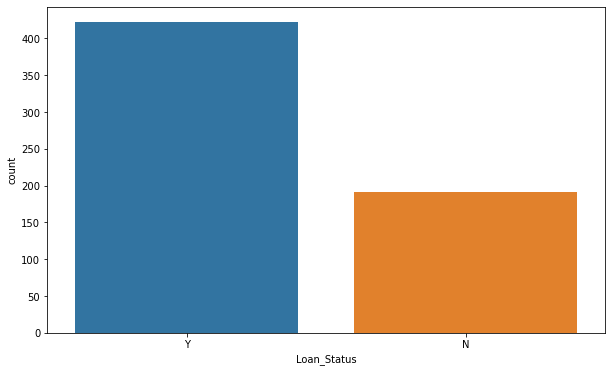

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(df_train['Loan_Status'])
plt.show()

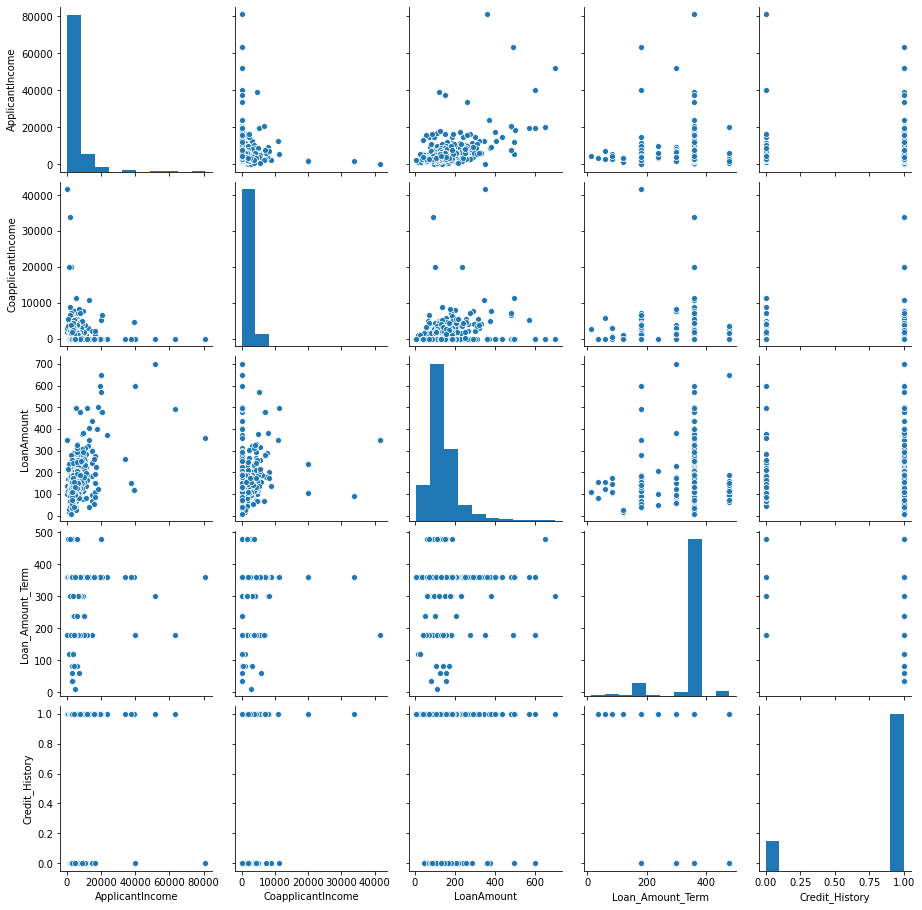

In [74]:
sns.pairplot(df_train)

In [75]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Observe trends and finding the important features for model. You can see that mostly males got accepted and most of them rejected as well. So there's no trend

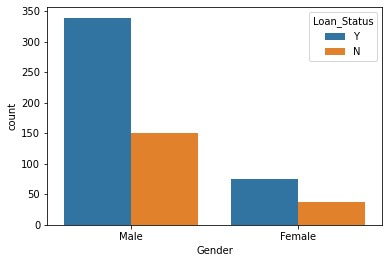

In [76]:
sns.countplot(x='Gender',hue='Loan_Status',data=df_train)
plt.show()

Again Nope

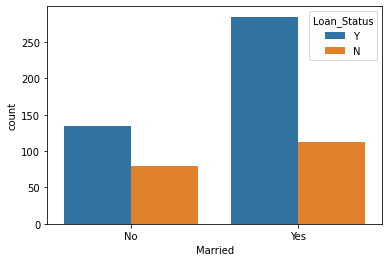

In [77]:
sns.countplot(x='Married',hue='Loan_Status',data=df_train)
plt.show()

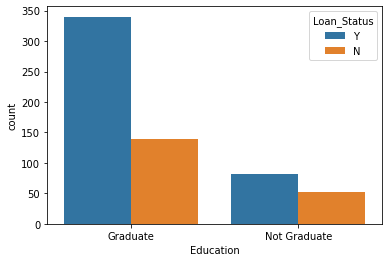

In [78]:
sns.countplot(x='Education',hue='Loan_Status',data=df_train)
plt.show()

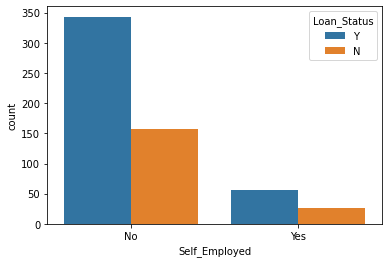

In [79]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df_train)
plt.show()

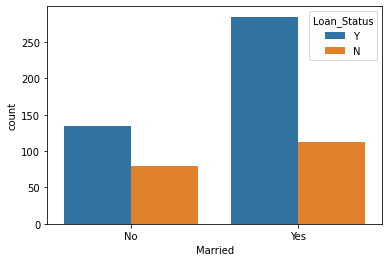

In [80]:
sns.countplot(x='Married',hue='Loan_Status',data=df_train)
plt.show()

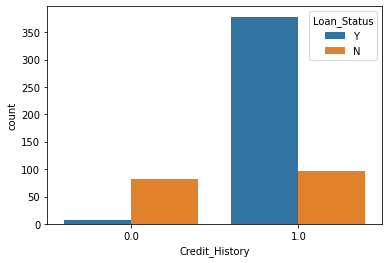

In [81]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df_train)
plt.show()

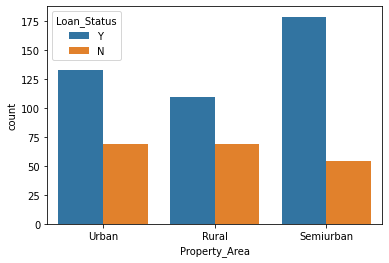

In [82]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df_train)
plt.show()

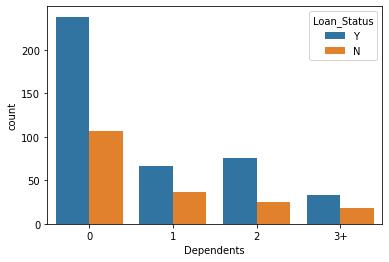

In [83]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df_train)
plt.show()

Taa daaa now it's  to impute missing value we will opt 2 strategies here <br>
1- Numerical value will be fill be filled with median <br>
2- Categorical value will be filled with most frequent ones


In [84]:
cat_data=[]
num_data=[]
for i,c in enumerate(df_train.dtypes):
    if c=='object':
        cat_data.append(df_train.iloc[:,i])
    else:
        num_data.append(df_train.iloc[:,i])

In [85]:
cat_data=pd.DataFrame(cat_data)
num_data=pd.DataFrame(num_data)

woooo

In [86]:
cat_data.head()

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes


Let's Transpose it

In [87]:
cat_data=cat_data.transpose()
num_data=num_data.transpose()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


Still there :( but we haven't filled it we just have seperated it right? So We will impute the missing values now

In [88]:
cat_data.isna().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

Bammmmmmmmm!!!!!!!!!!!

In [89]:
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [90]:
x=cat_data.apply(lambda x:x.value_counts().index[0])
x

Gender                 Male
Married                 Yes
Dependents                0
Education          Graduate
Self_Employed            No
Credit_History            1
Property_Area     Semiurban
Loan_Status               Y
dtype: object

Now did you get how we imputed the categorical column?

In [91]:
cat_data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Let's impute numerical columns

In [92]:
num_data=num_data.apply(lambda x: x.fillna(x.median()),axis=0)
num_data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [93]:
target_values={'Y':1,'N':0}
target_col=cat_data['Loan_Status']
# Now we saved it let's drop it
cat_data=cat_data.drop('Loan_Status',axis=1)
target_col=target_col.map(target_values)
target_col

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_data=cat_data.apply(le.fit_transform)

Seeems perfect till now <br>
time to rejoin all

In [95]:
df=pd.concat([num_data,cat_data,target_col],axis=1)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1,0,0,0,0,1,2,1
1,4583.0,1508.0,128.0,360.0,1,1,1,0,0,1,0,0
2,3000.0,0.0,66.0,360.0,1,1,0,0,1,1,2,1
3,2583.0,2358.0,120.0,360.0,1,1,0,1,0,1,2,1
4,6000.0,0.0,141.0,360.0,1,0,0,0,0,1,2,1


again split it :O

In [96]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36

In [97]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [98]:
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))


ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

model = LogisticRegression(random_state=42)
lg=model.fit(X_train,y_train)
y_pred=model.predict(X_test) 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [100]:
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [101]:
print('precision :',pre)
print('rec :',rec)
print('f1 :',f1)
print('loss :',loss)
print('acc :',acc)

precision : 0.7614678899082569
rec : 0.9764705882352941
f1 : 0.8556701030927835
loss : 7.862654703989302
acc : 0.7723577235772358


In [102]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print(i,v)


0 [-2.73723800e-06 -6.70450536e-05 -2.73531771e-03 -4.83442517e-03
  9.95074709e-02  7.75747015e-01 -2.30316994e-01 -3.21973149e-01
 -5.53422828e-02  2.89760419e+00  1.84926653e-01]


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [105]:
def train_model(models,X,y):
    for name,model in models.items():
        print(name,' :')
        model.fit(X,y)
        loss(y,model.predict(X))
        print('-'*20)

train_model(models,X_train,y_train)
              

LogisticRegression  :
  pre: 0.802
  rec: 0.973
  f1: 0.879
  loss: 6.331
  acc: 0.817
--------------------
KNeighborsClassifier  :
  pre: 0.745
  rec: 0.911
  f1: 0.820
  loss: 9.497
  acc: 0.725
--------------------
SVC  :
  pre: 0.689
  rec: 1.000
  f1: 0.816
  loss: 10.692
  acc: 0.690
--------------------
DecisionTreeClassifier  :
  pre: 0.800
  rec: 0.982
  f1: 0.881
  loss: 6.261
  acc: 0.819
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [106]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)

train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

 pre     0.799821
 rec     0.967380
 f1      0.875128
 loss    6.542765
 acc     0.810571
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.678279
 rec      0.822371
 f1       0.741817
 loss    13.506991
 acc      0.608939
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

 pre      0.686367
 rec      1.000000
 f1       0.813982
 loss    10.832739
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.800408
 rec     0.982264
 f1      0.881728
 loss    6.260817
 acc     0.818735
Name: 0, dtype: float64
------------------------------


In [107]:
x=[]
idx=[' pre', ' rec', ' f1', ' loss', ' acc']

log_reg=LogisticRegression()
for train,test in skf.split(X_train,y_train):
    log_reg.fit(X_train.iloc[train],y_train.iloc[train])
    ls=loss(y_train.iloc[test],log_reg.predict(X_train.iloc[test]),retu=True)
    x.append(ls)

df_val=pd.DataFrame(x,columns=idx)
df_val.head()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,pre,rec,f1,loss,acc
0,0.790698,1.000000,0.883117,6.217124,0.820000
1,0.825000,0.970588,0.891892,5.639098,0.836735
2,0.809524,1.000000,0.894737,5.639114,0.836735
3,0.837838,0.911765,0.873239,6.343955,0.816327
4,0.780488,0.941176,0.853333,7.753750,0.775510


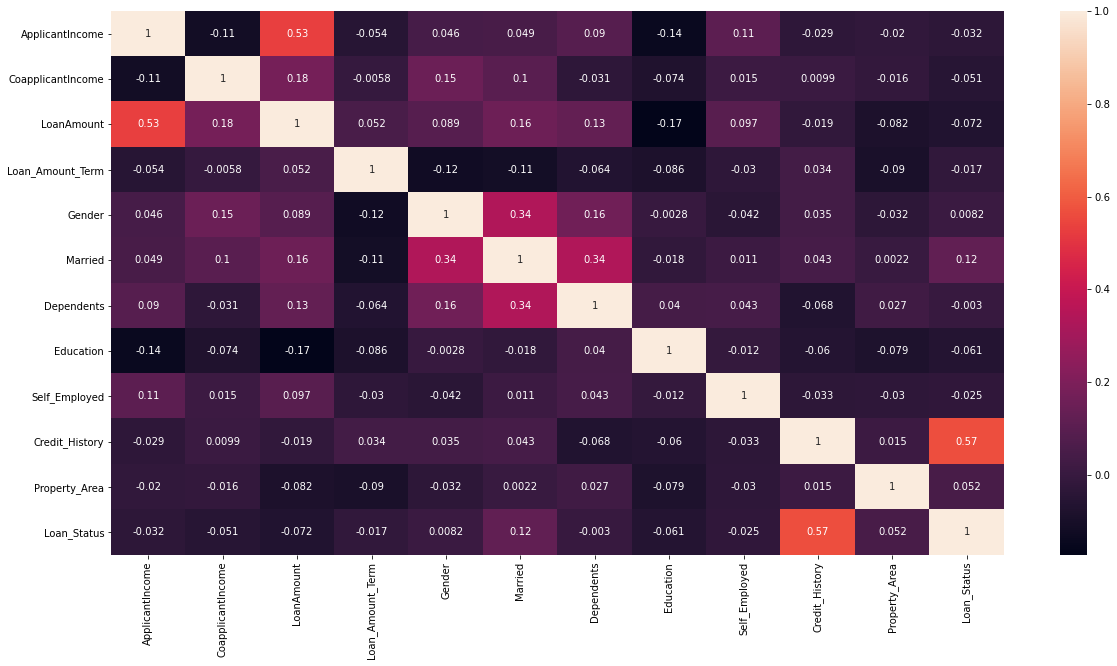

In [108]:
plt.figure(figsize=(20,10))
data_corr=pd.concat([X_train, y_train], axis=1)
data_corr=data_corr.corr()
sns.heatmap(data_corr,annot=True)
plt.show()

In [109]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
267,4333.0,1811.0,160.0,360.0,1,1,3,0,0,0,2
84,3988.0,0.0,50.0,240.0,1,1,1,0,0,1,2
56,2132.0,1591.0,96.0,360.0,1,1,0,0,0,1,1
52,4230.0,0.0,112.0,360.0,0,0,0,0,0,1,1
424,14880.0,0.0,96.0,360.0,1,1,0,0,0,1,1


# Feature Enfineering

In [110]:
X_train['COMB_CPI_AI'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['Comb_LA_LAT'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


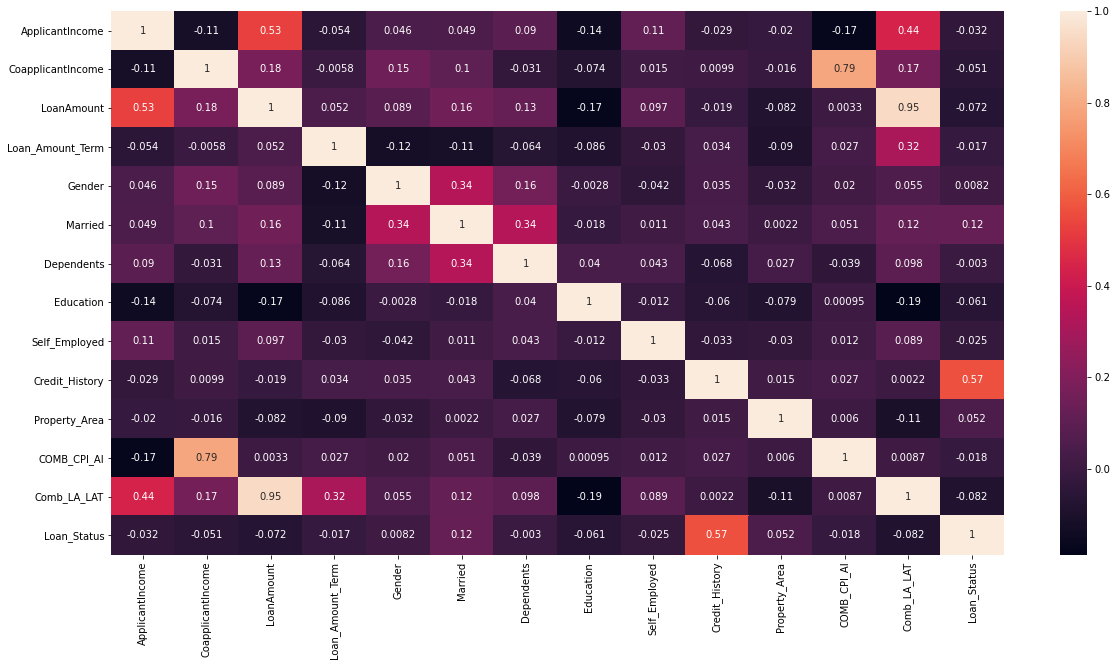

In [111]:
plt.figure(figsize=(20,10))
data_corr=pd.concat([X_train, y_train], axis=1)
data_corr=data_corr.corr()
sns.heatmap(data_corr,annot=True)
plt.show()

In [112]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [113]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre      0.686555
 rec      0.994118
 f1       0.812096
 loss    10.903225
 acc      0.684327
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

 pre      0.678275
 rec      0.819697
 f1       0.740938
 loss    13.508399
 acc      0.608898
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.686367
 rec      1.000000
 f1       0.813982
 loss    10.832739
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.800408
 rec     0.982264
 f1      0.881728
 loss    6.260817
 acc     0.818735
Name: 0, dtype: float64
------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# scale
By taking log

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


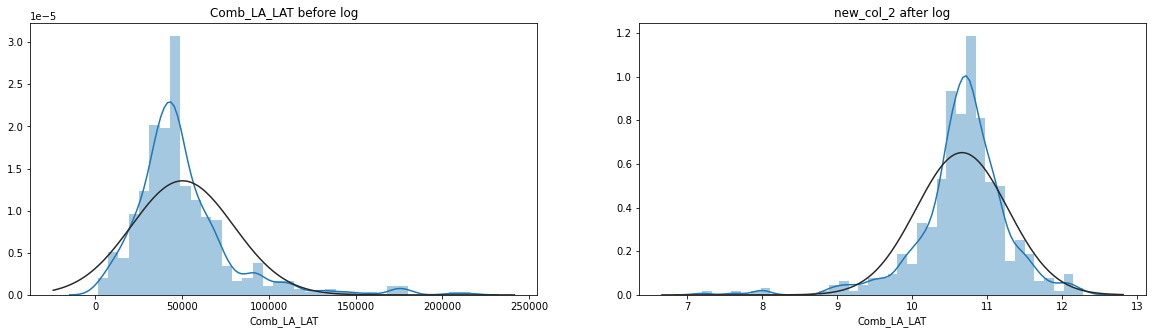

In [115]:

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['Comb_LA_LAT'], ax=ax[0], fit=norm)
ax[0].set_title('Comb_LA_LAT before log')

X_train['Comb_LA_LAT'] = np.log(X_train['Comb_LA_LAT'])  # logarithm of all the values

sns.distplot(X_train['Comb_LA_LAT'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [116]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

 pre     0.800408
 rec     0.982264
 f1      0.881728
 loss    6.260817
 acc     0.818735
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.753917
 rec     0.913547
 f1      0.825370
 loss    9.143777
 acc     0.735265
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipyke

 pre     0.800244
 rec     0.982264
 f1      0.881660
 loss    6.260817
 acc     0.818735
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.800408
 rec     0.982264
 f1      0.881728
 loss    6.260817
 acc     0.818735
Name: 0, dtype: float64
------------------------------


In [117]:
X_train['COMB_CPI_AI']=[x if x==0 else 1 for x in X_train['COMB_CPI_AI']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
X_train['COMB_CPI_AI'].value_counts()

1.0    278
0.0    213
Name: COMB_CPI_AI, dtype: int64

In [131]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts())
    print("-"* 50)

1    404
0     87
Name: Gender, dtype: int64
--------------------------------------------------
1    323
0    168
Name: Married, dtype: int64
--------------------------------------------------
0    284
1     83
2     81
3     43
Name: Dependents, dtype: int64
--------------------------------------------------
0    385
1    106
Name: Education, dtype: int64
--------------------------------------------------
0    427
1     64
Name: Self_Employed, dtype: int64
--------------------------------------------------
1    414
0     77
Name: Credit_History, dtype: int64
--------------------------------------------------
1    190
2    154
0    147
Name: Property_Area, dtype: int64
--------------------------------------------------
1.0    278
0.0    213
Name: COMB_CPI_AI, dtype: int64
--------------------------------------------------
10.738134    25
10.491274    13
10.586584    13
10.673596    12
10.961278     8
             ..
9.574983      1
10.085809     1
11.236381     1
10.332669     1
10.203

Look at the max wohooo there's an outlier

In [132]:
X_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,COMB_CPI_AI,Comb_LA_LAT
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.822811,0.657841,0.761711,0.215886,0.130346,0.843177,1.014257,0.566191,10.665489
std,0.382218,0.474916,1.019324,0.411855,0.337027,0.364004,0.783634,0.496105,0.612389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.194437
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.450452
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.730291
75%,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.000000,10.973700
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,12.283034


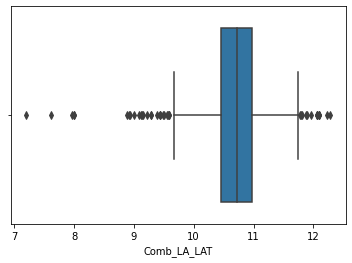

In [134]:
sns.boxplot(X_train['Comb_LA_LAT'])

Let's find quartile range then set the  threshold to drop the values

In [136]:
new_col_2_out = X_train['Comb_LA_LAT']
q1, q3 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75)
iqr = q1 - q3
threshold=0.1
cut=iqr*threshold
lower, upper = q1 - cut, q3 + cut
print('lower :',lower)
print('upper :',upper)

lower : 10.502777037294447
upper : 10.921375552306085


In [138]:

data_out = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_out))
data_outliers = data_out.drop(data_out[(data_out['Comb_LA_LAT'] > upper) | (data_out['Comb_LA_LAT'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))


len X_train before dropping the outliers 491
len X_train before dropping the outliers 192


In [140]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

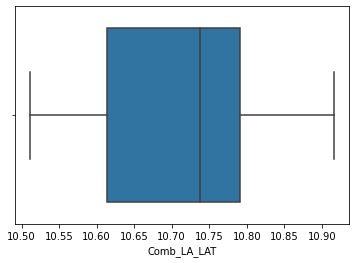

In [141]:
sns.boxplot(X_train['Comb_LA_LAT'])

In [142]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

 pre     0.857318
 rec     0.985714
 f1      0.915125
 loss    4.490137
 acc     0.870000
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.812542
 rec     0.912088
 f1      0.857248
 loss    7.353244
 acc     0.787105
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packa

 pre      0.697895
 rec      1.000000
 f1       0.821903
 loss    10.434588
 acc      0.697895
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.857318
 rec     0.985714
 f1      0.915125
 loss    4.490137
 acc     0.870000
Name: 0, dtype: float64
------------------------------


In [143]:
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
426,4606.0,0.0,81.0,360.0,0,0,1,1,0,1,0
208,2479.0,0.0,59.0,360.0,1,0,0,0,0,1,2
361,5000.0,3667.0,236.0,360.0,1,1,2,0,0,1,1
416,2600.0,0.0,160.0,360.0,0,0,1,0,0,1,2
393,1993.0,1625.0,113.0,180.0,1,1,2,1,0,1,1


In [144]:
X_test_new = X_test.copy()

In [146]:

X_test_new['Comb_CA_AI'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['Comb_LA_LAT'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['Comb_LA_LAT'] = np.log(X_test_new['Comb_LA_LAT'])

X_test_new['Comb_CA_AI'] = [x if x==0 else 1 for x in X_test_new['Comb_CA_AI']]

In [147]:
X_test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Comb_CA_AI,Comb_LA_LAT
426,0,0,1,1,0,1,0,0.0,10.280553
208,1,0,0,0,0,1,2,0.0,9.963641
361,1,1,2,0,0,1,1,1.0,11.349936
416,0,0,1,0,0,1,2,0.0,10.961278
393,1,1,2,1,0,1,1,1.0,9.920345


In [ ]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)